In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def sample_d_ball_efficiently(num_pts, dim):
    u = np.random.normal(0,1, size = [num_pts, dim])  # an array of d normally distributed random variables
    norms = np.sum(u**2, axis = 1) **(0.5)
    r = np.random.random(size = dim)**(1.0/dim)
    x= r*u/norms.reshape([num_pts,1])
    return x

# Volume of a high dimensional unit ball is concentrated near its surface and is also concentrated at its equator.

In [41]:
s = sample_d_ball_efficiently(1000,100)

In [42]:
gram = np.matmul(s,s.T)

In [44]:
np.sum(gram)

1034.8118280398226

In [51]:
# All sums
sum_of_grams = []
for seed in range(100):
    np.random.seed(seed)
    s = sample_d_ball_efficiently(2000,1000)
    gram = np.matmul(s,s.T)
    sum_of_grams.append(np.sum(gram))
    # seems to converge to num_pts (precision increases with number of dimensions?)
    
print(sum_of_grams)

In [56]:
# All sums without one
sum_of_grams = []
for seed in range(100):
    np.random.seed(seed)
    s = sample_d_ball_efficiently(2000,1000)
    gram = np.matmul(s,s.T)
    idx = np.random.choice(2000)
    gram = gram[:-1,:-1]
    sum_of_grams.append(np.sum(gram))
    # also seems to converge to num_pts...
    
print(sum_of_grams)

[1850.5018905787342, 1911.060654621166, 1890.739435573611, 1957.7548165034855, 2070.040631074849, 2069.1154191722326, 2022.8490006269808, 2078.7213161449868, 1969.407256535177, 1996.8841459492924, 1917.4290475977168, 1971.082760596659, 1965.6603907949443, 1886.7333829373335, 1947.0707458009806, 2167.5791684655674, 2085.656242063453, 2013.4932507720343, 2058.3853202981413, 1776.117778020375, 2119.108308169281, 1999.7169593876658, 1884.357744849489, 1930.0608786239472, 2054.5882900028673, 2136.0695649820877, 1983.9530417613453, 1983.1556030616812, 2041.8894051676457, 2118.017159345209, 1975.791878009211, 1855.439392275148, 2030.6614785505983, 1935.5078334690652, 1963.6967627572637, 2034.253907799077, 1972.2883260223343, 2086.4214803898667, 2055.7192875095056, 1975.355690957961, 2007.732995807747, 2067.9680781882003, 2065.981201170958, 2133.3586520352856, 2037.006210598007, 1991.0943078863406, 2082.858446940578, 1969.624163839856, 2049.016112436237, 1930.8615681205956, 1970.100197441639, 

In [73]:
# Only one sums
sum_of_grams = []
for seed in range(100):
    np.random.seed(seed)
    s = sample_d_ball_efficiently(6000,100)
    gram = np.matmul(s,s.T)
    sum_of_grams.append(np.sum(gram-np.diag(np.diag(gram)),axis=0))
    
print(sum_of_grams)

[array([ -4.52943339,  13.46795085,   0.05924049, ...,   8.1975441 ,
       -12.5036158 ,  10.92398488]), array([ -2.14855674,   4.13419302, -18.35534348, ...,   1.7080355 ,
        -8.2765442 ,  10.68915099]), array([  5.98896953,  -1.93480556,   1.20359773, ..., -12.75996141,
         0.51939866,  -4.1334194 ]), array([ 2.93056492e+00, -4.20006412e+00,  5.33608936e+00, ...,
        6.00378482e+00,  1.87905987e+01, -1.02008198e-02]), array([ -6.5001207 ,  -0.52833458, -12.26716115, ...,   0.8086852 ,
         4.72312238,  13.25115007]), array([ 4.55982638,  2.09616836,  3.9392095 , ..., -1.55787852,
        2.99619643,  5.95270578]), array([-17.05166156,   6.81175782,   9.31025556, ...,  -5.76538742,
         9.8759626 ,   7.65451957]), array([-5.95852462, 13.2542944 ,  5.73078835, ...,  1.28109947,
        8.89264426,  1.17436864]), array([  4.49975385,  -0.25729662,  -7.58345031, ...,   5.54374862,
        -8.2737959 , -11.50490267]), array([-5.26790685,  5.70693109, -2.9911694 , ..

In [72]:
gram.shape

(6000, 6000)

(array([  14.,   98.,  441., 1000., 1598., 1470.,  947.,  359.,   56.,
          17.]),
 array([-25.4564996 , -20.29426502, -15.13203044,  -9.96979585,
         -4.80756127,   0.35467331,   5.51690789,  10.67914248,
         15.84137706,  21.00361164,  26.16584622]),
 <BarContainer object of 10 artists>)

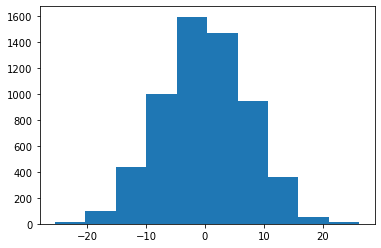

In [76]:
plt.hist(sum_of_grams[97])

In [77]:
print([np.mean(i) for i in sum_of_grams])

[0.17205709621531246, -0.07629395675925281, 0.08148087630310599, 0.0302552904224092, 0.24684567739169608, 0.007381210765979811, -0.23298356540465912, -0.02264224602415773, 0.021624576070247564, 0.24605847386059826, 0.15266778453957616, -0.1744313743635745, -0.12192994268923175, -0.0385419605214619, -0.0738390401677355, 0.04088154922858405, 0.03605944657827885, 0.00614239026775599, -0.09275553896571116, -0.18486057994579885, -0.20459843686533144, 0.10202304216199062, -0.05403571604584549, 0.017231030771171777, -0.03033056699526106, -0.1363783142221146, 0.07916828937110595, -0.02720597371048516, -0.05333901184163045, 0.19573591228079582, -0.09510221558652197, -0.23945861125701232, 0.3318430228475197, 0.15763449831806728, -0.1781066071597314, -0.2719635278728648, -0.1834612633847708, 0.1066588456116425, -0.05999427408649818, 0.18897853582277135, 0.03580471958342892, 0.11813388728086549, 0.07317011326687424, -0.08769493895167643, -0.0009197883857900516, 0.15918845710797305, 0.1050074845685

In [80]:
# All without diagonal
sum_of_grams = []
for seed in range(100):
    np.random.seed(seed)
    s = sample_d_ball_efficiently(6000,1000)
    gram = np.matmul(s,s.T)
    sum_of_grams.append(np.mean(gram-np.diag(np.diag(gram))))
    
print(sum_of_grams)

[5.25853450048292e-06, -6.079610708980834e-06, 6.063751560365911e-06, -1.0989079941127612e-05, 1.0355258672907026e-05, -2.0262697680476054e-06, -2.7341889214344177e-06, 5.390342134106816e-06, 5.668662871401933e-06, -6.685824475924704e-06, 7.701826464903809e-06, -9.093258180742962e-06, 1.2287235517258695e-05, 1.0491806522127554e-05, -1.090190654292392e-05, 3.613398694212532e-06, -6.150019545300288e-06, -7.061831321185235e-06, 2.362321223704975e-06, 1.8025587171418674e-06, 5.0264839044950265e-06, -6.219165207389795e-06, 6.03582161001595e-07, -1.1555004947908057e-05, 3.03730479908071e-06, 1.4418633844609124e-06, 6.605708232529268e-06, 1.3306650086924506e-06, 1.0754938238226224e-05, 8.119003097014161e-06, -1.2882737985692606e-06, -1.3978424388724404e-05, 1.16874461865954e-06, -1.9787996524766685e-07, -6.580072259443949e-06, -6.007742223372568e-06, -1.1443870249444483e-05, 6.068160928387633e-06, 1.0066462057726981e-05, 5.927959306239858e-07, -3.4188963209187476e-06, -2.842517251746556e-06, 

## two cubes

In [83]:
num_pts = 2000
num_dims = 1000
var1, var2 = 1,1
mean1,mean2 = -0.55, 0.55

X = np.concatenate([var1*(np.random.rand(num_pts, num_dims)-var1*0.5*np.ones([num_pts,num_dims]))+mean1*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1), var2*(np.random.rand(num_pts, num_dims)-var2*0.5*np.ones([num_pts,num_dims]))+mean2*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1)], axis = 0)

In [98]:
# In C1
num_pts = 2000
num_dims = 1000
var1, var2 = 1,1
mean1,mean2 = -0.55, 0.55

for seed in range(100):
    np.random.seed(seed)
    X = np.concatenate([var1*(np.random.rand(num_pts, num_dims)-var1*0.5*np.ones([num_pts,num_dims]))+mean1*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1), var2*(np.random.rand(num_pts, num_dims)-var2*0.5*np.ones([num_pts,num_dims]))+mean2*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1)], axis = 0)
    gram = np.matmul(X[num_pts:],X[:num_pts].T)
#     print(np.mean(gram-np.diag(np.diag(gram))))
    print(np.mean(gram))
    # Very constant for both C1 and C2 around 1.4M for num_pts = 2000, dims = 1000, vars of 1 and mean1,mean2 = -0.55, 0.55
    # -1.2M for C1, C2 cross
    # in C1,C2 without diagonals: ~0.3 (mean and not sum like before)
    # Across C1,C2: ~-0.3
    # => This is roughly 0.55

-0.30401944787896057
-0.3133086487040559
-0.2980745088464724
-0.29962286850123737
-0.31137310763710885
-0.3102831554832699
-0.2873187622165737
-0.31318278782333164
-0.3000035609112432
-0.3082396055232132
-0.30840153067067955
-0.30999594915223005
-0.3067979468357962
-0.3095154896369217
-0.2998757786868797
-0.3069859385683071
-0.29373543376296735
-0.29435538172180087
-0.30174253209512886
-0.3095060063328356
-0.3085937951471659
-0.2964935005272142
-0.30056274412559636
-0.31204212911536794
-0.29982148804758374
-0.30044872500397546
-0.29634444353955763
-0.3040437439514365
-0.2984152945227844
-0.30278625493425476
-0.3071325624271299
-0.30468773656869363
-0.3075791390881817
-0.2980541471897482
-0.3051399447523243
-0.30386365215700034
-0.3022610144983554
-0.3016373040789892
-0.3104632406292057
-0.3132245408700457
-0.29777526713343766
-0.3004431626082891
-0.3136720999847176
-0.30887926670262583
-0.29964521794302035
-0.29505735234576286
-0.29719266626382884
-0.29722317035191226
-0.29950320015994

# Tests

In [6]:
c1=1000
n=10000

print((2*c1*n-2*c1**2)/(n**(3/2)))

18.0


In [8]:
c1=5000
c2=5000
n=c1+c2
print(2*c1*c2/(n**(3/2)))

50.0


In [18]:
c1=1
c2=10000
n=c1+c2
m=1

print(c1*c2*(n-2*m)/(n**2))

0.9997000499930009
